# Keras basics: Image classification

(Note this is pretty much identical to the quick-start notebook, so you might want to skip this one)

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import utls

In [2]:
tf.__version__

'2.2.0'

## Import the Fashion MNIST dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_labels.min(), train_labels.max()

(0, 9)

The class labels are as follows:

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's have a look at the data

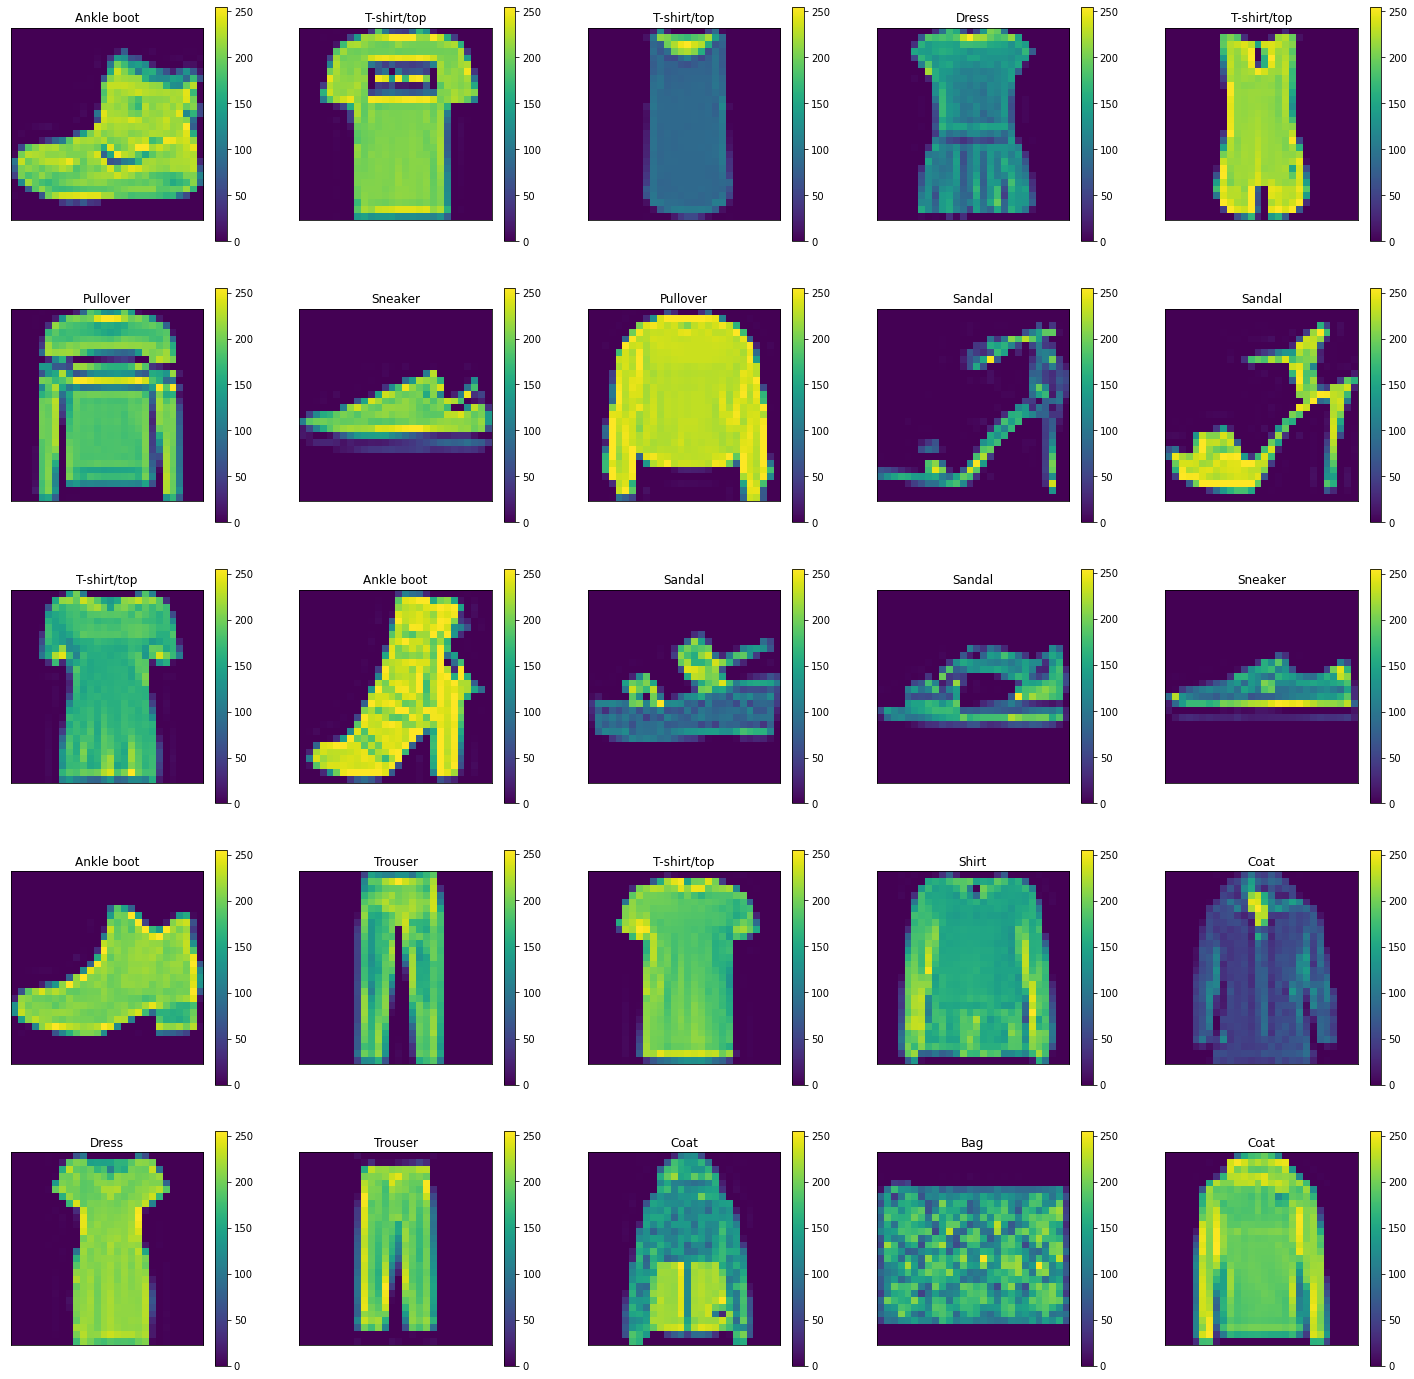

In [8]:
fig, axs = utls.plot(n_rows=5, n_cols=5)
for i in range(25):
    ax = axs[i]
    im = ax.imshow(train_images[i,...])
    ax.set_title(class_names[train_labels[i]])
    fig.colorbar(im, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])

Re-scale the images to 0-1

In [9]:
train_images, test_images = train_images/255.0, test_images/255.0

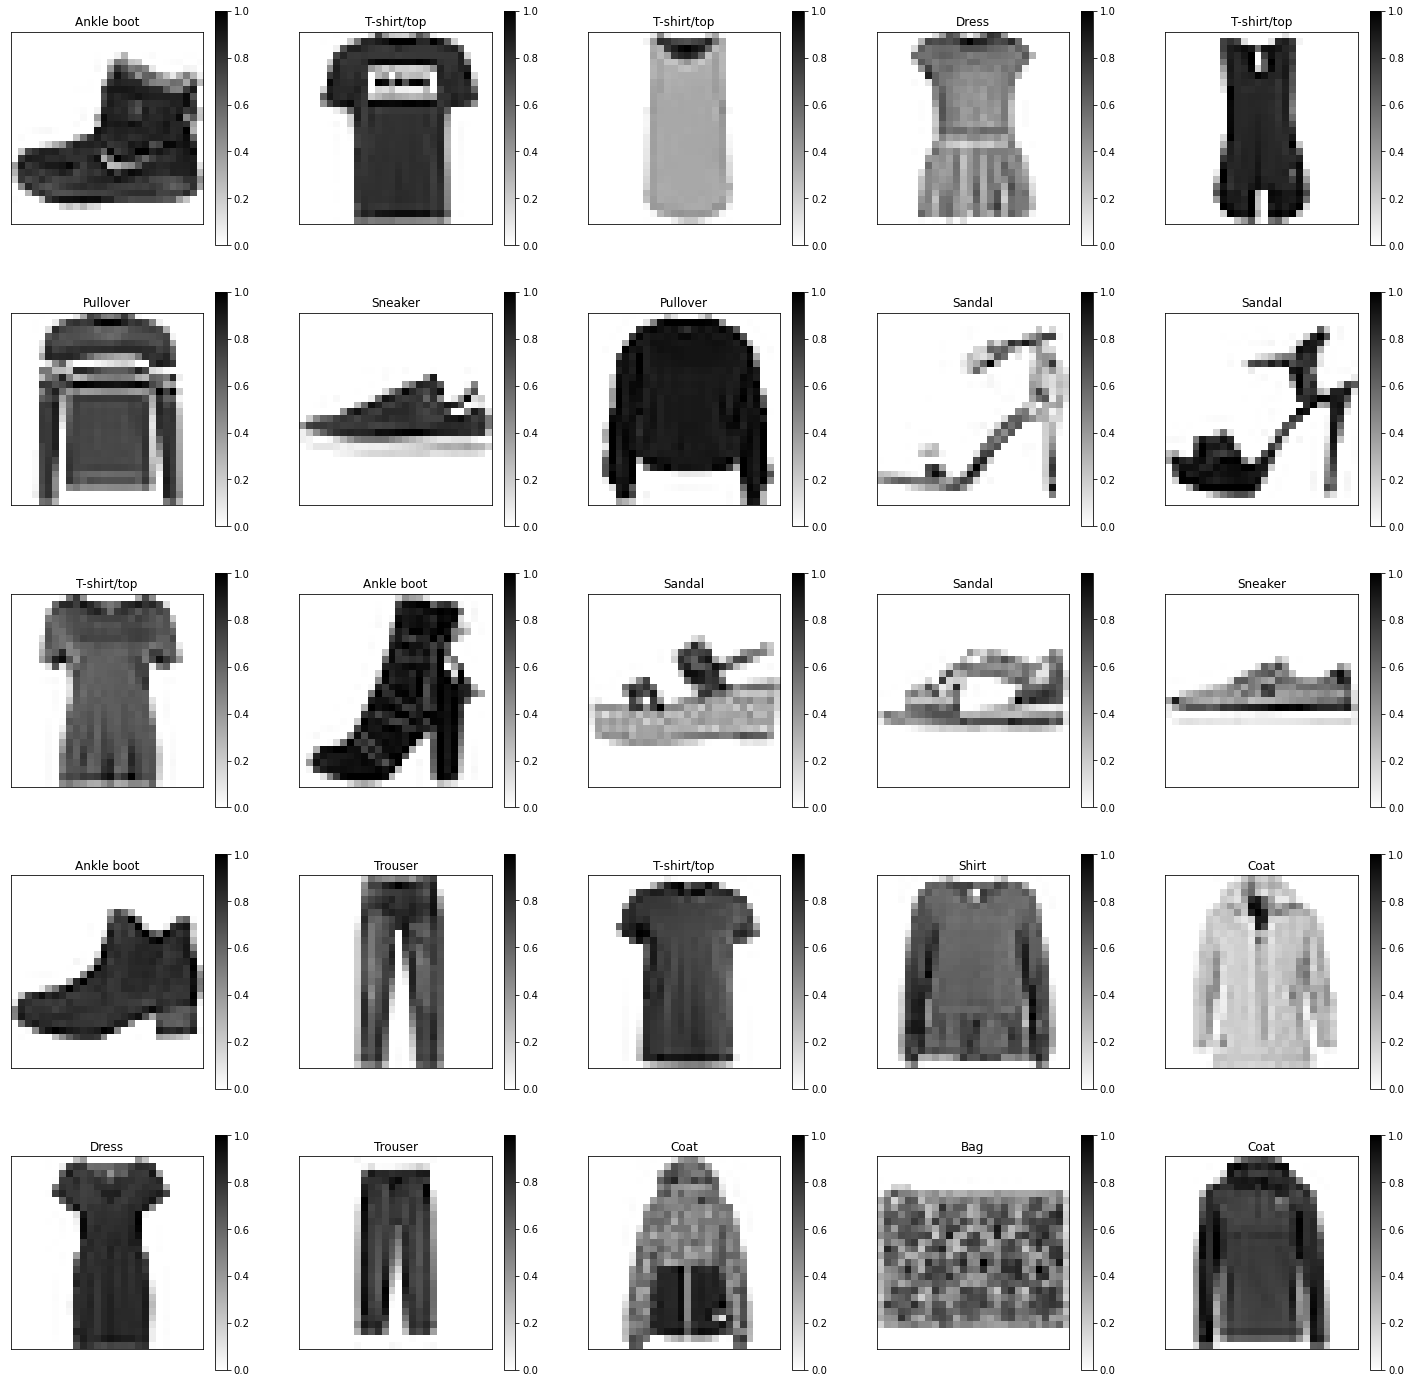

In [10]:
fig, axs = utls.plot(n_rows=5, n_cols=5)
for i in range(25):
    ax = axs[i]
    im = ax.imshow(train_images[i,...], cmap = plt.cm.binary)
    ax.set_title(class_names[train_labels[i]])
    fig.colorbar(im, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])

## Build a neural network

As per the previous notebook, but without dropout. We are going to demonstrate under/over-fit here.

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

In [13]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4933 - accuracy: 0.8270
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3748 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3352 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3100 - accuracy: 0.8865
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2936 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2813 - accuracy: 0.8968: 0s - loss: 0.2816 - accu
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2670 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2581 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2505 - accuracy: 0.9063
Epoch 10/10
1875/1875 [==============================] -

Evaluate accuracy on the test set

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.3318 - accuracy: 0.8824


So the accuracy on the test dataset is greater than the accuracy of the training dataset, which demonstrates overfitting. This is no bad thing -- a model architecture which is even moderately appropriate for the task at hand ought to have the ability to overfit the data. 

## Make predictions

In [16]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

In [18]:
predictions.shape

(10000, 10)

In [20]:
predictions_most_probable = np.argmax(predictions, axis=1)

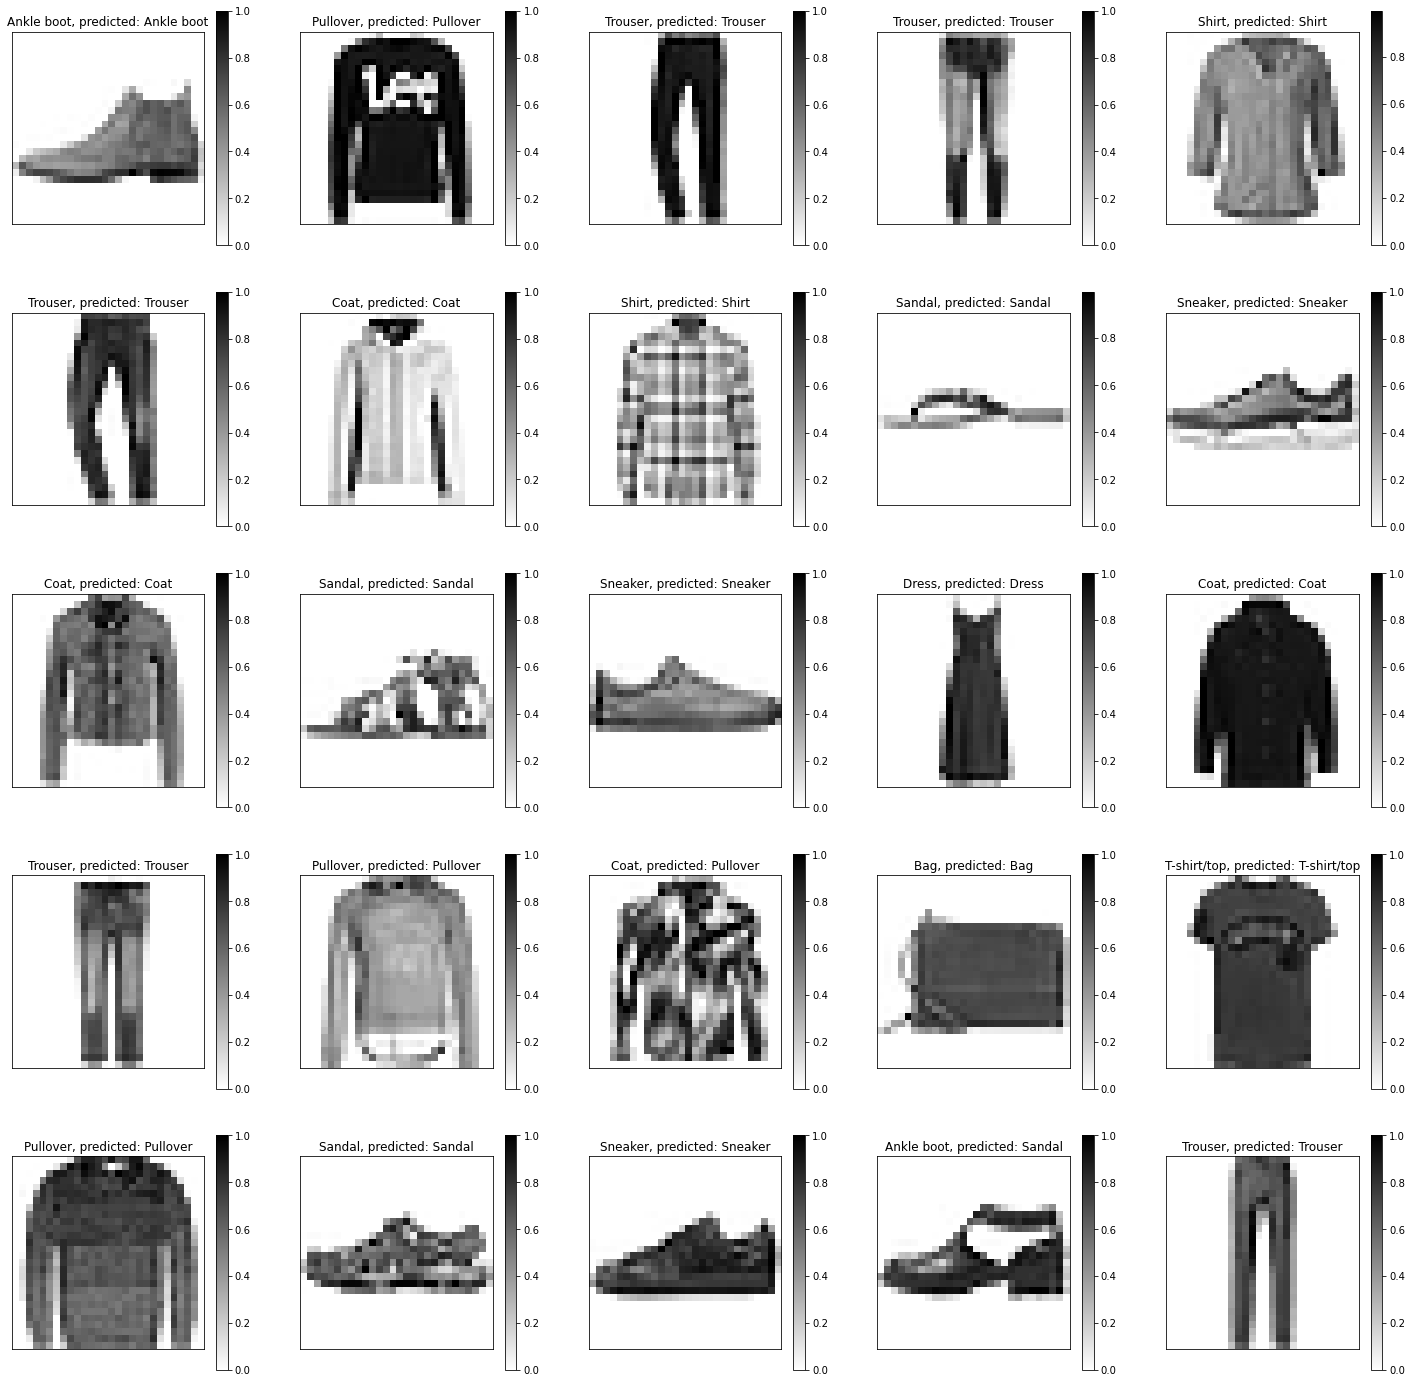

In [23]:
fig, axs = utls.plot(n_rows=5, n_cols=5)
for i in range(25):
    ax = axs[i]
    im = ax.imshow(test_images[i,...], cmap = plt.cm.binary)
    ax.set_title(f'{class_names[test_labels[i]]}, predicted: {class_names[predictions_most_probable[i]]}')
    fig.colorbar(im, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])

Let's look at some misclassified images

In [35]:
mismatches = np.where(test_labels != predictions_most_probable)[0]

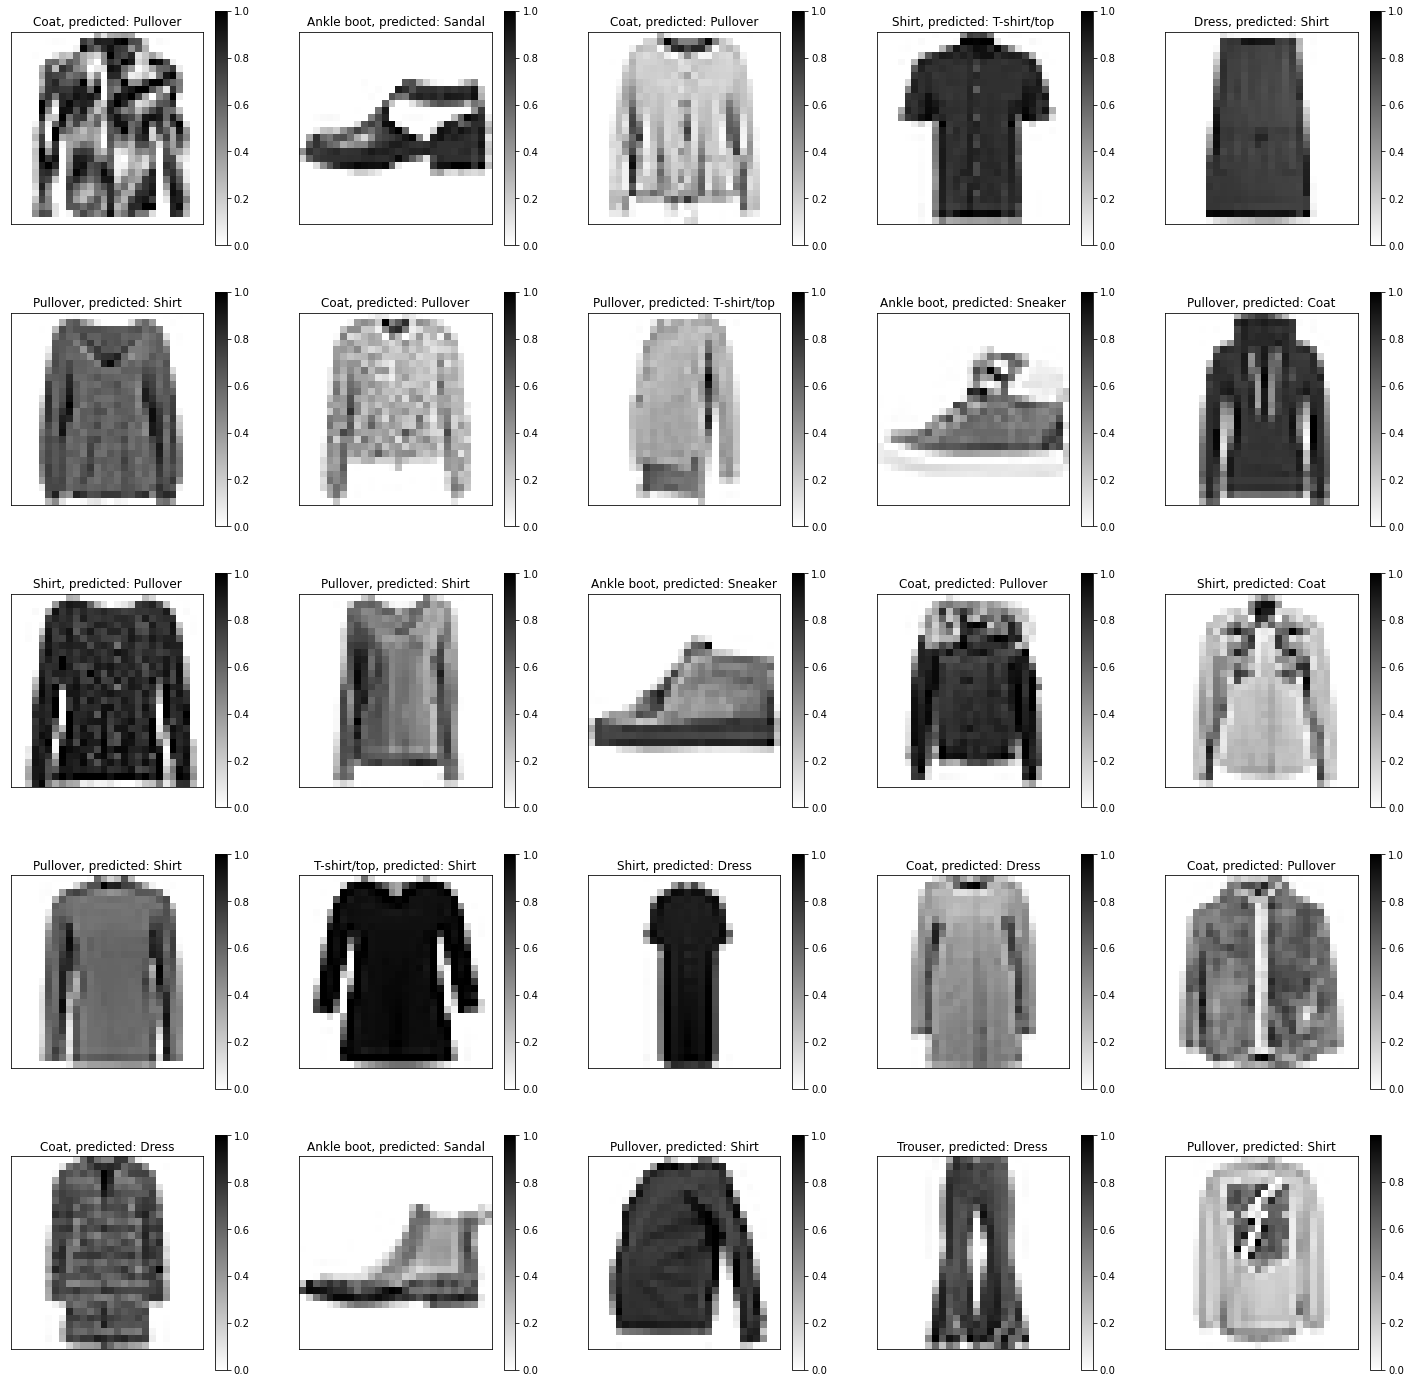

In [38]:
fig, axs = utls.plot(n_rows=5, n_cols=5)
for i in range(25):
    ax = axs[i]
    im = ax.imshow(test_images[mismatches[i],...], cmap = plt.cm.binary)
    ax.set_title(f'{class_names[test_labels[mismatches[i]]]}, predicted: {class_names[predictions_most_probable[mismatches[i]]]}')
    fig.colorbar(im, ax=ax)
    ax.set_xticks([])
    ax.set_yticks([])

Some pretty reasonable mistakes in here